# ReproLab Demo

Welcome to ReproLab! This extension helps you make your research more reproducible.

## Features

- **Create Experiments**: Automatically save immutable snapshots of your code under `git` tags to preserve the **exact code and outputs**
- **Manage Dependencies**: Automatically gather and pin **exact package versions**, so that others can set up your environment with one command
- **Cache Data**: Call external API/load manually dataset only once, caching function will handle the rest
- **Archive Data**: Caching function can also preserve the compressed data in *AWS S3*, so you always know what data was used and reduce the API calls
- **Publishing guide**: The reproducibility checklist & automated generation of reproducability package make publishing to platforms such as Zenodo very easy

## Getting Started

1. Use the sidebar to view ReproLab features
2. Create virtual environment and pin your dependencies, go to reprolab section `Create reproducible environment` 
3. Create an experiment to save your current state, go to reprolab section `Create experiment`
4. Archive your data for long-term storage, go to reprolab section `Demo` and play around with it.
5. Publish your work when ready, remember to use reproducability checklist from the section `Reproducibility Checklist`

## Example Usage of persistio decorator

To cache and archive the datasets you use, both from local files and APIs we developed a simple decorator that put over your function that gets the datasets caches the file both locally and in the cloud so that the dataset you use is archived and the number of calls to external APIs is minimal and you don't need to keep the file around after you run it once.

Here is an example using one of NASA open APIs. If you want to test it out yourself, you can copy the code, but you need to provide bucket name and access and secret key in the left-hand panel using the `AWS S3 Configuration` section.

```python
import requests
import pandas as pd
from io import StringIO

# The two lines below is all that you need to add
from reprolab.experiment import persistio
@persistio()
def get_exoplanets_data_from_nasa():
    url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"

    query = """
    SELECT TOP 10
        pl_name AS planet_name,
        hostname AS host_star,
        pl_orbper AS orbital_period_days,
        pl_rade AS planet_radius_earth,
        disc_year AS discovery_year
    FROM
        ps
    WHERE
        default_flag = 1
    """

    params = {
        "query": query,
        "format": "csv"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        
        print(df)
        
    else:
        print(f"Error: {response.status_code} - {response.text}")
    return df

exoplanets_data = get_exoplanets_data_from_nasa()
```

If you run this cell twice you will notice from the logs that the second time file was read from the compressed file in the cache. If you were to lose access to local cache (e.g. by pulling the repository using different device) `persistio` would fetch the data from the cloud archive.


For more information, visit our [documentation](https://github.com/your-repo/reprolab).

In [27]:
!pip install matplotlib 

In [28]:
import random
random_integers = [random.randint(10, 90) for _ in range(10)]
correlated_integers = [x + random.randint(1, 10) for x in random_integers]

✅ Hash written to persistio_hashes.yaml
[upload_to_cloud] Uploading reprolab_data/a756c776b5de6b8d8f275cb9b6e6e0f9.pickle.pkl.gz to s3://https://scruffy.lab.uvalight.net:9001/browser/naa-vre-user-data/a29lbi5ncmV1ZWxsQGxpZmV3YXRjaC5ldS9SZXByb2xhYi8=/a756c776b5de6b8d8f275cb9b6e6e0f9.pickle.pkl.gz


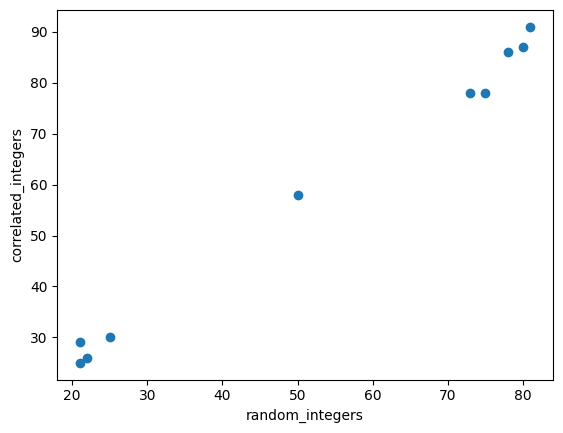

In [29]:
import matplotlib.pyplot as plt
from reprolab.experiment import persistio

@persistio()
def make_plot(random_integers, correlated_integers):
    plt.scatter(random_integers, correlated_integers)
    plt.xlabel(f"{random_integers=}".split('=')[0])
    plt.ylabel(f"{correlated_integers=}".split('=')[0])

make_plot(random_integers, correlated_integers)

In [ ]:
from reprolab.experiment import start_experiment
start_experiment()

2025-09-22 09:50:54 - INFO - Starting experiment process
2025-09-22 09:50:54 - INFO - Step 1: Saving all notebooks
2025-09-22 09:50:54 - INFO - Attempting to save all Jupyter notebooks...
2025-09-22 09:50:54 - INFO - ipylab save command executed successfully
2025-09-22 09:50:54 - INFO - nbformat processing completed for 2 notebooks


In [ ]:
from reprolab.experiment import end_experiment
end_experiment()